Loading the .csv into a Dataframe

In [17]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert to a Dataframe
Full_Solar_Data = pd.read_csv('SolarData.csv',sep=',')
rawSolarData_Unclean = pd.read_csv('SolarData.csv',sep=',') # Load .csv file into the a pandas data frame. Hopefully this wont sprawl your device
rawSolarData_Unclean.value_counts()


flare      start.date  start.time  peak      end       duration.s  peak.c/s  total.counts  energy.kev  x.pos.asec  y.pos.asec  radial  active.region.ar  flag.1  flag.2  flag.3  flag.4  flag.5
2021310    2002-02-13  07:03:52    07:05:14  07:07:48  236         336       313392        25-50       -272         390        476     9825              A1      GS      P1      PE      Q2        1
14021657   2014-02-16  15:37:00    15:38:46  15:42:36  336         68        73056         6-12        -961        -213        985     0                 A0      DR      P1      PE      Q2        1
14021629   2014-02-16  07:41:20    07:41:38  07:46:28  308         40        59040         6-12         134         783        795     0                 A0      DR      P1      PE      Q2        1
14021630   2014-02-16  08:22:32    08:24:18  08:27:16  284         72        38448         6-12        -955        -186        973     0                 A0      DR      P1      PE      Q2        1
14021643   2014-02-1

### Histogram of: (1st attempt)
1. duration
2. peak

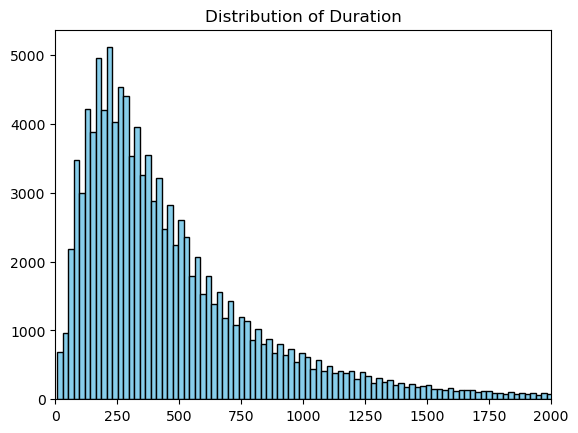

In [18]:
# distribution: Duration 
plt.hist(rawSolarData_Unclean['duration.s'],bins=200, color='skyblue', edgecolor='black')
plt.xlim(0,2000)
plt.title("Distribution of Duration")
plt.show()

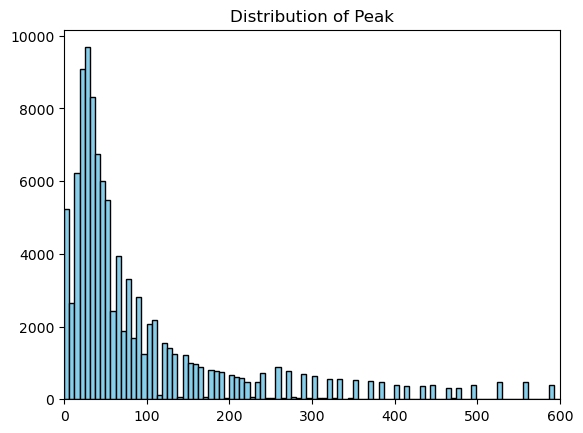

In [19]:
# distribution Peak
PeakSemiClean=[]
for value in rawSolarData_Unclean['peak.c/s']:
    if value < 1250:
        PeakSemiClean.append(value)
plt.hist(PeakSemiClean,bins=200, color='skyblue', edgecolor='black')
plt.xlim(0,600) # Focus on [0,600]
plt.title("Distribution of Peak")
plt.show()

### Scatterplot of: (1st Attempt):
1. Peaks vs. Duration

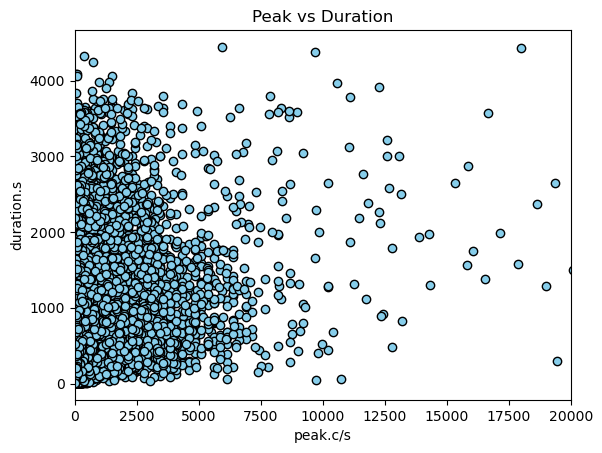

In [20]:
# Peaks vs Duration

plt.scatter(rawSolarData_Unclean['peak.c/s'], rawSolarData_Unclean['duration.s'], color='skyblue', edgecolor='black')
plt.xlim(0,20000)
plt.title('Peak vs Duration')
plt.xlabel('peak.c/s')
plt.ylabel('duration.s')
plt.show()

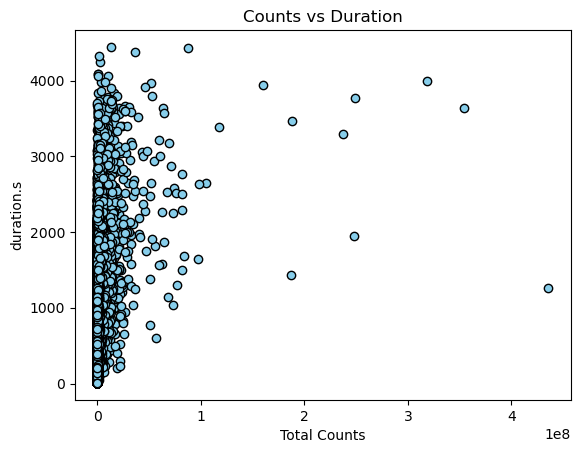

In [21]:
# Counts vs Duration

plt.scatter(rawSolarData_Unclean['total.counts'], rawSolarData_Unclean['duration.s'], color='skyblue', edgecolor='black')

plt.title('Counts vs Duration')
plt.xlabel('Total Counts')
plt.ylabel('duration.s')
plt.show()

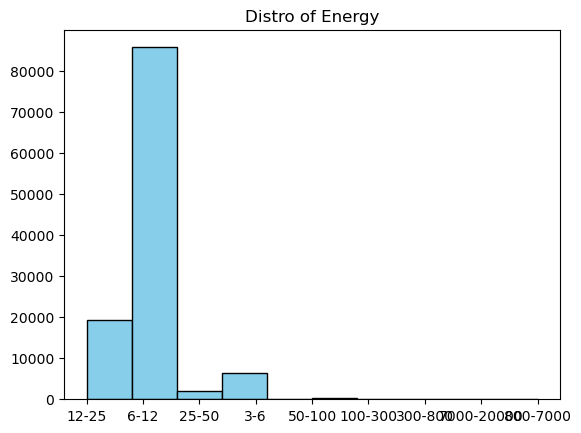

In [27]:
# Hist of Energy

plt.hist(Full_Solar_Data['energy.kev'], bins=10, color='skyblue', edgecolor='black')

plt.title('Distro of Energy')
# plt.xlabel('Total Counts')
# plt.ylabel('duration.s')
plt.show()


In [45]:
# Solar events per day
currentdate = ""
currentTrack = 0
DatePairs = {}

for C in Full_Solar_Data['start.date']:
    if C == currentdate:
        currentTrack += 1
    else:
        if currentdate:  # Check if currentdate is not empty
            DatePairs[currentdate] = currentTrack
        currentdate = C
        currentTrack = 1

# Add the last date and its count to DatePairs
if currentdate:
    DatePairs[currentdate] = currentTrack

# Printing the result
for key, value in DatePairs.items():
    print(key, ':', value)


2002-02-12 : 2
2002-02-13 : 10
2002-02-14 : 11
2002-02-15 : 1
2002-02-16 : 3
2002-02-17 : 15
2002-02-18 : 32
2002-02-19 : 8
2002-02-20 : 21
2002-02-21 : 16
2002-02-22 : 10
2002-02-23 : 22
2002-02-24 : 4
2002-02-25 : 24
2002-02-26 : 18
2002-02-27 : 9
2002-02-28 : 25
2002-03-01 : 18
2002-03-02 : 4
2002-03-03 : 2
2002-03-04 : 4
2002-03-05 : 40
2002-03-06 : 47
2002-03-07 : 36
2002-03-08 : 6
2002-03-09 : 11
2002-03-10 : 7
2002-03-11 : 3
2002-03-12 : 4
2002-03-13 : 46
2002-03-14 : 16
2002-03-15 : 4
2002-03-16 : 6
2002-03-17 : 7
2002-03-18 : 7
2002-03-19 : 5
2002-03-20 : 4
2002-03-21 : 4
2002-03-22 : 6
2002-03-23 : 3
2002-03-24 : 7
2002-03-25 : 9
2002-03-26 : 20
2002-03-27 : 21
2002-03-28 : 24
2002-03-29 : 71
2002-03-30 : 68
2002-03-31 : 61
2002-04-01 : 1
2002-04-02 : 11
2002-04-03 : 5
2002-04-04 : 9
2002-04-05 : 6
2002-04-06 : 4
2002-04-07 : 8
2002-04-08 : 6
2002-04-09 : 10
2002-04-10 : 13
2002-04-11 : 31
2002-04-12 : 69
2002-04-13 : 6
2002-04-14 : 25
2002-04-15 : 18
2002-04-16 : 14
2002-04-

In [29]:
# Day Year Hash

print(Full_Solar_Data['start.date'])


2002-02-12
